**BASIC IMAGE CLASSIFICATION USING CIFAR-10 DATASET**

In [27]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [28]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


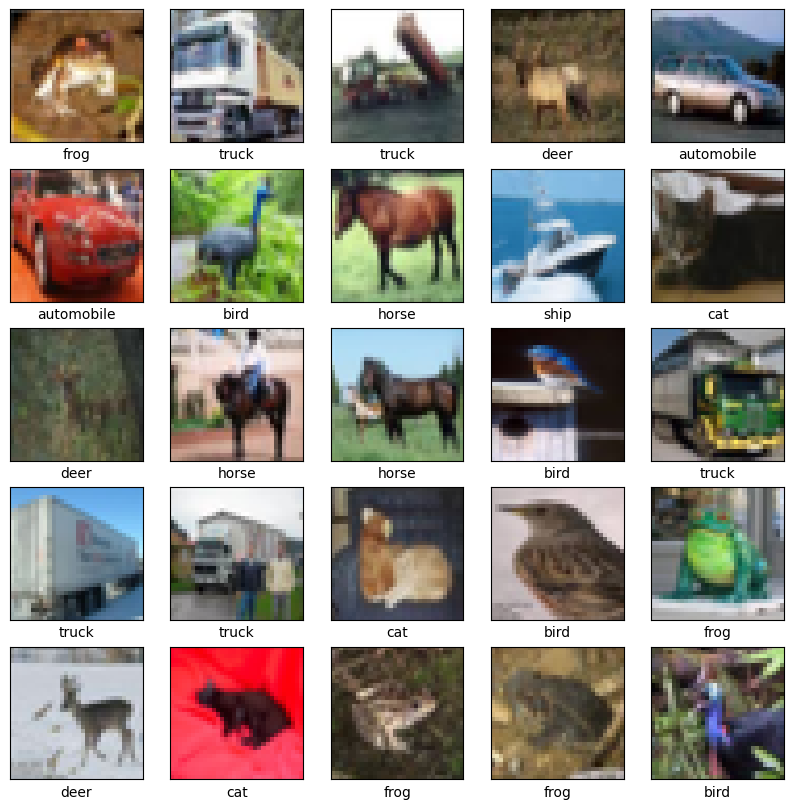

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [30]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])


In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [10]:
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.3402 - loss: 1.7765 - val_accuracy: 0.5511 - val_loss: 1.2401
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5740 - loss: 1.1935 - val_accuracy: 0.6262 - val_loss: 1.0520
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6407 - loss: 1.0221 - val_accuracy: 0.6470 - val_loss: 1.0011
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.6751 - loss: 0.9275 - val_accuracy: 0.6581 - val_loss: 0.9735
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7028 - loss: 0.8503 - val_accuracy: 0.6837 - val_loss: 0.9141
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7224 - loss: 0.7889 - val_accuracy: 0.6907 - val_loss: 0.8926
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7426 - loss: 0.7374 - val_accuracy: 0.6966 - val_loss: 0.8858
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.7594 -

In [32]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - 8ms/step - accuracy: 0.0997 - loss: 2.3100
Test accuracy: 0.09969999641180038


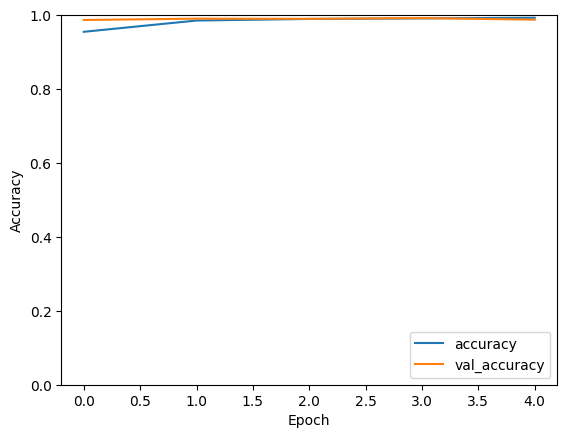

In [41]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


**HANDWRITTEN DIGIT RECOGNITION USING CNNS (MNIST DATASET)**

In [33]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [34]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape data to fit the model
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [35]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


In [36]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [37]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.8959 - loss: 0.3345 - val_accuracy: 0.9869 - val_loss: 0.0445
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9846 - loss: 0.0485 - val_accuracy: 0.9904 - val_loss: 0.0309
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9892 - loss: 0.0341 - val_accuracy: 0.9900 - val_loss: 0.0299
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9916 - loss: 0.0265 - val_accuracy: 0.9920 - val_loss: 0.0254
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9936 - loss: 0.0190 - val_accuracy: 0.9877 - val_loss: 0.0361


In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


313/313 - 2s - 5ms/step - accuracy: 0.9886 - loss: 0.0357
Test accuracy: 0.9886000156402588


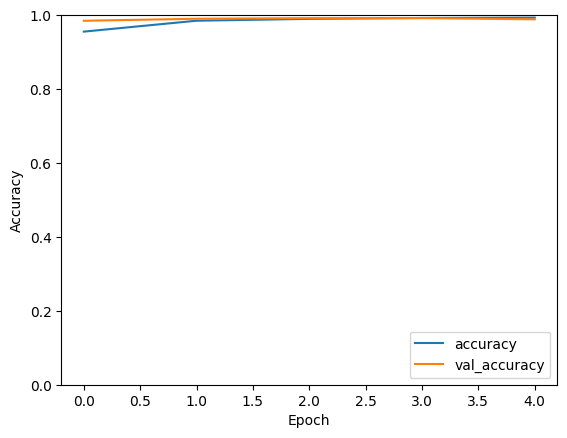

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


**Fine-Tuning Pre-trained Models for Cat vs. Dog Classification**

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models, applications
import matplotlib.pyplot as plt


In [21]:
# Define paths to the train and validation datasets
train_dir = '/kaggle/input/cat-and-dog/training_set'
validation_dir = '/kaggle/input/cat-and-dog/test_set'

# Load the Cats vs. Dogs dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),
    batch_size=32,
    subset='training',
    validation_split=0.2,
    seed=123
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    subset='validation',
    validation_split=0.2,
    seed=123
)

# Define the class names
class_names = train_dataset.class_names


Found 8005 files belonging to 1 classes.
Using 6404 files for training.
Found 2023 files belonging to 1 classes.
Using 404 files for validation.


In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [23]:
base_model = applications.VGG16(input_shape=(150, 150, 3),
                                include_top=False,
                                weights='imagenet')
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [39]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [42]:
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=validation_dataset)


Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_9" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 150, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 150, 150, 3), dtype=float32)
  • training=True
  • mask=None

In [43]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_fine = model.fit(train_dataset,
                         epochs=5,
                         validation_data=validation_dataset)


Epoch 1/5


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_9" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 150, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 150, 150, 3), dtype=float32)
  • training=True
  • mask=None

In [44]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy}')


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "conv2d_9" is incompatible with the layer: expected axis -1 of input shape to have value 1, but received input with shape (None, 150, 150, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 150, 150, 3), dtype=float32)
  • training=False
  • mask=None

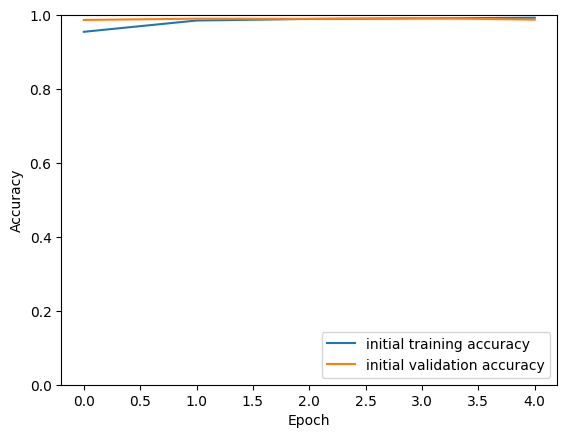

In [45]:
plt.plot(history.history['accuracy'], label='initial training accuracy')
plt.plot(history.history['val_accuracy'], label='initial validation accuracy')
if 'history_fine' in locals():
    plt.plot(history_fine.history['accuracy'], label='fine-tuning accuracy')
    plt.plot(history_fine.history['val_accuracy'], label='fine-tuning validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
